In [22]:
# import the necessary packages

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [23]:
# load the dataset with the extracted features

df = pd.read_csv('../data/extracted_features.csv')

df = df.drop(columns=['date', 'state', 'city_or_county'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216389 entries, 0 to 216388
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   latitude                   208488 non-null  float64
 1   longitude                  208488 non-null  float64
 2   congressional_district     204475 non-null  float64
 3   min_age_participants       147020 non-null  float64
 4   avg_age_participants       147016 non-null  float64
 5   max_age_participants       147017 non-null  float64
 6   n_participants_child       199272 non-null  float64
 7   n_participants_teen        199272 non-null  float64
 8   n_participants_adult       199272 non-null  float64
 9   n_males                    204908 non-null  float64
 10  n_females                  204908 non-null  float64
 11  n_killed                   216389 non-null  int64  
 12  n_injured                  216389 non-null  int64  
 13  n_arrested                 21

# Clustering Preprocessing

Before we can cluster the data, we need to preprocess it. We will use two different scalers to compare the results. The first one is the StandardScaler, which scales the data to have a mean of 0 and a standard deviation of 1. The second one is the MinMaxScaler, which scales the data to be in the range of 0 and 1. 

In [24]:
# prepare the scalers for comparison

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

# scale the data
z_scaled = scaler.fit_transform(df.dropna())
mm_scaled = minmax.fit_transform(df.dropna())

# Choosing the Number of Clusters

We will use the elbow method to determine the optimal number of clusters. The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. The optimal number of clusters is the value after which the distortion/inertia start decreasing in a linear fashion.

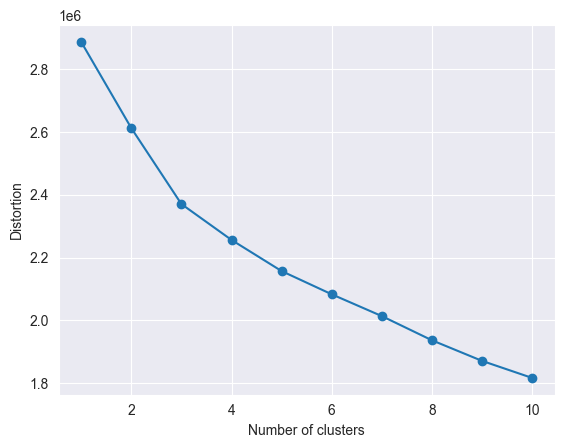

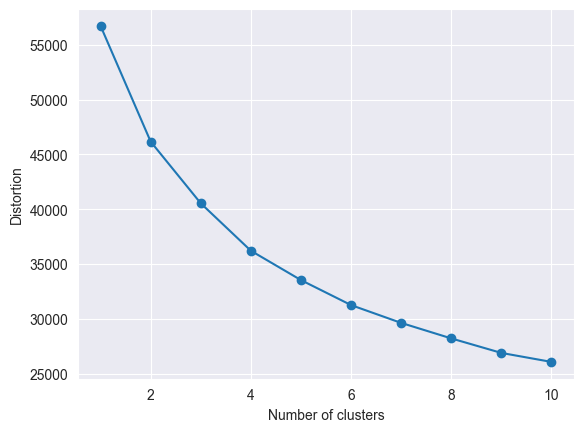

In [25]:
# determine the optimal number of clusters

from sklearn.cluster import KMeans

def elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    return distortions

for data in [z_scaled, mm_scaled]:
    distortions = elbow_method(data)
    plt.plot(range(1, len(distortions)+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    

We also try to apply other methods to determine the optimal number of cluster, such as the silhouette score and the Calinski-Harabasz index.

In [26]:
# silhouette score
from sklearn.metrics import silhouette_score
# sse / ch index
from sklearn.metrics import calinski_harabasz_score

def evalue_score(data, max_clusters=8):
    silhouette = []
    ch_index = []
    for i in range(2, max_clusters+1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(data)
        silhouette.append(silhouette_score(data, km.labels_))
        ch_index.append(calinski_harabasz_score(data, km.labels_))
    return silhouette

**Note** it takes a long time to run the following code, so don't run it unless you really need to.

In [ ]:

for data in [z_scaled, mm_scaled]:
    silhouette, ch_index = evalue_score(data)
    plt.plot(range(2, len(silhouette)+2), silhouette, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()
    plt.plot(range(2, len(ch_index)+2), ch_index, marker='x')
    plt.xlabel('Number of clusters')
    plt.ylabel('Calinski-Harabasz index')
    plt.show()
    